# Exercises

---

## Exercise 1: structured and ustructured images
Write a function that outputs the number of PC you have to choose to retain a given percentage of explained variance.
Use this funtion on the  handwritten digit data, and plot the number of PC needed to retain a certain fraction of EVR, for a few vaules of EVR.

Compare this curve to the one you can obtain in unstructured images: either generate images with the same shape of our data or randomly permute the pixels in each image independenlty. How does the number of PC needed to retain a certain fraction of the variance in this case compare to the number needed for digit images?

In [1]:
# libraries and load data
import numpy as np
from scipy import io
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data

dataset = load_digits()
images = dataset.data
# defines a scaler objects
scaler = StandardScaler()
# z-score with fit_transform method
X =scaler.fit_transform(images)

In [31]:
# create function
def components_required(X, target_variance):
    pca = PCA()
    pca.fit(X)
    cumulative_evr = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.searchsorted(cumulative_evr, target_variance)+1 # finds first number of components that reaches or exceeds desired variance
    return n_components

In [39]:
# try the function
print("Components required to explain 80% of variance:",components_required(X, 0.8))
print("Components required to explain 90% of variance:",components_required(X, 0.9))

Components required to explain 80% of variance: 21
Components required to explain 90% of variance: 31


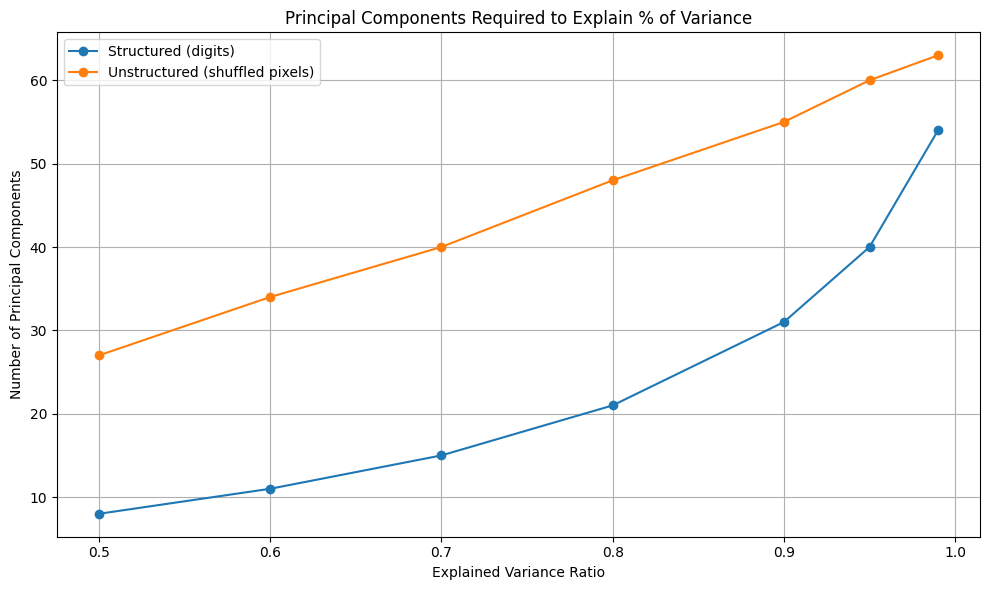

In [45]:
# define list of target variances to test
evrs = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]

# apply function to original structured data
structured_images = [components_required(X, variance) for variance in evrs]

# shuffle pixels in each image randomly to obtain unstructured data
np.random.seed(42)
images_shuffled = np.array([np.random.permutation(img) for img in images])
X_shuffled = scaler.fit_transform(images_shuffled)
unstructured_images = [components_required(X_shuffled, variance) for variance in evrs]

# Plotting
plt.figure(figsize=(10,6))
plt.plot(evrs, structured_images, label='Structured (digits)', marker='o')
plt.plot(evrs, unstructured_images, label='Unstructured (shuffled pixels)', marker='o')
plt.xlabel('Explained Variance Ratio')
plt.ylabel('Number of Principal Components')
plt.title('Principal Components Required to Explain % of Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()

**Report**

The graph above shows that structured images need significantly fewer components to retain the same amount of variance than unstructured (randomly shuffled pixels) images. This is because pixels are correlated with each other and therefore meaningful - shuffling removes these correlations. As a result, variance is more uniformly distributed across pixels, with no spatial structure between them. Therefore, more components are needed to explain the variance. Furthermore, the graph shows that this relationship is linear for unstructured data, while it is more exponentially increasing for structured data.

## Exercise 2: cortical dynamics

Work with the cortical data we used in the lesson. Write some code that lets you easily chose a specific behavioural event from the `trial_data` dictionary (the recorded events are `CSp` for positive conditioned stimulus, `CSn` for negative conditioned stimulus and `licks` for lick events), one of the principal components, an onset time and and offset time, and plots the timecourse of this component in the selected period around the chosen event type.

Use this code to explore the data: how do different components behave? Do you notice any patterns? How would you test for the statistical significance of the effects that you see (if any)?

## Exercise 3: nonlinear dimensionality reduction

Using the MNIST digit dataset, explore the effect of hyperparameters on the result of nonlinear dimensionality reduction methods.

- Change the `perplexity` and `exageration` parameters in `TNSE` (one at a time). Graphically compare the results of different values.
- Change the neighbourhood size in `Isomap` (set by the parameter `n_neighbors`), and visualize how the results change.

Finally, try to apply one or more of these methods to the cortical data we used in the lessons. How do the data look in two dimensions? Do any cluster seem to appear? Are they robust with respect to hyperparameter choice?